In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
contracts = pd.read_csv('~/consulting_analysis_vIsuals/data/contracts.csv')
contracts

,contract_id,customer_id,contract_start,contract_term,deposit,monthly_amt
0,1,127,8/17/2019,12,"$53,000.00","$11,600.00"
1,2,119,12/1/2019,22,"$77,000.00","$14,600.00"
2,3,160,5/1/2019,15,"$13,000.00","$22,800.00"
3,4,7,12/8/2019,23,"$56,000.00","$11,400.00"
4,5,144,2/11/2019,7,"$21,000.00","$19,800.00"
...,...,...,...,...,...,...
995,996,57,11/8/2019,15,"$38,000.00","$5,300.00"
996,997,126,1/13/2019,20,"$28,000.00","$16,000.00"
997,998,89,5/8/2019,7,"$73,000.00","$18,400.00"
998,999,52,3/26/2019,7,"$63,000.00","$21,600.00"


In [13]:
customers = pd.read_csv('~/consulting_analysis_vIsuals/data/customers.csv')
customers

,id,company,sector,industry,email,address,city,state,zip
0,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,2,Izio,Energy,Oil & Gas Production,farlet1@comcast.net,15360 Village Green Street,Spokane,WA,99252
2,3,Twitterworks,NaN,NaN,alerohan2@ox.ac.uk,29 Hovde Hill,Milwaukee,WI,53234
3,4,Viva,Health Care,Major Pharmaceuticals,wgiovanitti3@nytimes.com,074 Center Place,Topeka,KS,66667
4,5,Jabberstorm,Technology,Computer Software: Prepackaged Software,pscallon4@fc2.com,4 Moose Way,Terre Haute,IN,47805
...,...,...,...,...,...,...,...,...,...
245,246,Livefish,Energy,Oilfield Services/Equipment,gcressy6t@twitter.com,05019 Eastwood Alley,Brooksville,FL,34605
246,247,Katz,NaN,NaN,siacobini6u@fc2.com,6567 Old Shore Center,Omaha,NE,68134
247,248,Yombu,Public Utilities,Natural Gas Distribution,ccandy6v@tumblr.com,6442 Vahlen Avenue,Salt Lake City,UT,84125
248,249,Dynazzy,NaN,NaN,lmothersole6w@nsw.gov.au,15 Oakridge Court,New York City,NY,10060


In [14]:
combined_data = pd.merge(contracts, customers[['id', 'state', 'city']], left_on = 'customer_id', right_on = 'id', how = 'left')
combined_data

,contract_id,customer_id,contract_start,contract_term,deposit,monthly_amt,id,state,city
0,1,127,8/17/2019,12,"$53,000.00","$11,600.00",127,ID,Boise
1,2,119,12/1/2019,22,"$77,000.00","$14,600.00",119,KY,Lexington
2,3,160,5/1/2019,15,"$13,000.00","$22,800.00",160,MS,Meridian
3,4,7,12/8/2019,23,"$56,000.00","$11,400.00",7,TX,El Paso
4,5,144,2/11/2019,7,"$21,000.00","$19,800.00",144,AZ,Phoenix
...,...,...,...,...,...,...,...,...,...
995,996,57,11/8/2019,15,"$38,000.00","$5,300.00",57,NE,Lincoln
996,997,126,1/13/2019,20,"$28,000.00","$16,000.00",126,MD,Baltimore
997,998,89,5/8/2019,7,"$73,000.00","$18,400.00",89,WA,Olympia
998,999,52,3/26/2019,7,"$63,000.00","$21,600.00",52,KS,Topeka


In [15]:
state_contracts = combined_data.groupby('state')['customer_id'].count().nlargest(len(combined_data['state'].unique())).reset_index().rename(columns = {'state':'State', 'customer_id':'Number of Contracts'})
state_contracts

,State,Number of Contracts
0,TX,104
1,CA,88
2,FL,70
3,WA,54
4,NY,43
5,KS,43
6,VA,35
7,OK,34
8,CO,34
9,OH,33


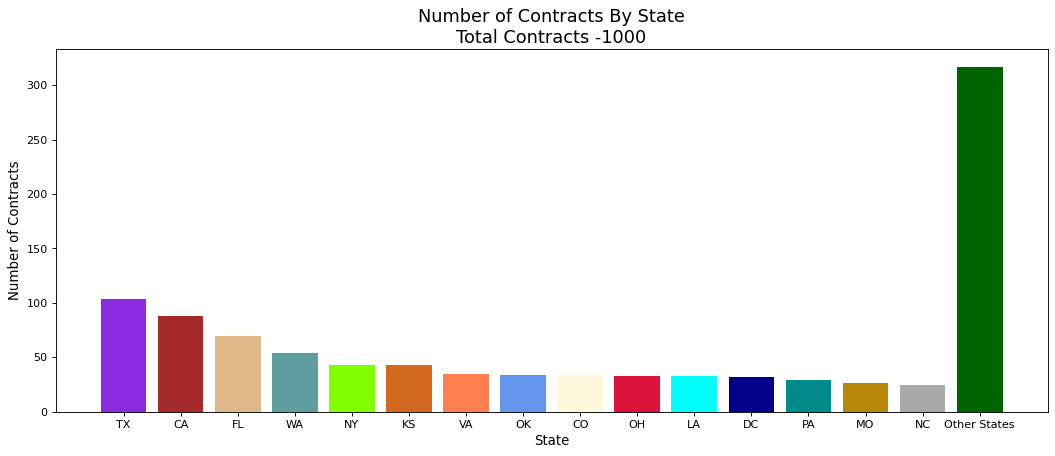

In [16]:
def visualise_all_states(N = 15):
    top_state_contracts = state_contracts[:N]
    top_state_contracts = top_state_contracts.append({'State':'Other States', 'Number of Contracts':sum(state_contracts['Number of Contracts'][N:])}, ignore_index = True)
    bar_cols = [x for x,y in pltc.cnames.items()][10:10+len(top_state_contracts)]
    plt.figure(figsize=(16, 6), dpi=80)
    plt.bar(top_state_contracts['State'],top_state_contracts['Number of Contracts'], color = bar_cols)
    plt.title('Number of Contracts By State\nTotal Contracts -'+str(sum(top_state_contracts['Number of Contracts'])), fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Number of Contracts', fontsize=12)
    if N > 15:
        plt.xticks(rotation='vertical')
    plt.show();
    
visualise_all_states(N=15)